# Official Example

## [Task 1] Run Official Examples

<br />

research


https://github.com/tensorflow/models/tree/master/research

<br />

tutorials


https://github.com/tensorflow/models/tree/master/tutorials

I am going to run "Image recognition".


https://www.tensorflow.org/tutorials/images/hub_with_keras

<br />

I demonstrate:

    1. How to use TensorFlow Hub with tf.keras.
    
    2. How to do image classification using TensorFlow Hub.
    
    3. How to do simple transfer learning.

### Setup

In [1]:
from __future__ import absolute_import, division, print_function
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split

W0308 14:56:18.764014 4493510080 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
tf.VERSION

'1.13.1'

In [3]:
# Prepare the TensorFlow flowers dataset

data_root = tf.keras.utils.get_file(
    'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [4]:
# Load the data by "tf.keras.preprocessing.image.ImageDataGenerator"
# Change image modules to float inputs in the [0, 1] range by "ImageDataGenerator"'s "rescale"
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# Takes the path to a directory & generates batches of augmented data by "flow_from_directory"
image_data = image_generator.flow_from_directory(str(data_root))

Found 3670 images belonging to 5 classes.


In [5]:
# Resulting object

for image_batch,label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 256, 256, 3)
Label batch shape:  (32, 5)


### An ImageNet Classifier

In [6]:
# URL of MobileNet V2

classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2"   #@param {type:"string"}

In [7]:
# Load a mobilenet by hub.Module
def classifier(x):
    classifier_module = hub.Module(classifier_url)
    return classifier_module(x)

# Returns expected [height, width] dimensions of an image input by "hub.get_expected_image_size"
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(classifier_url))

Instructions for updating:
Colocations handled automatically by placer.


W0308 14:56:20.562248 4493510080 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Wrap the classifier up as a keras layer

classifier_layer = layers.Lambda(classifier, input_shape=IMAGE_SIZE+[3])
classifier_model = tf.keras.Sequential([classifier_layer])

classifier_model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0308 14:56:25.586251 4493510080 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1001)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Check the code

IMAGE_SIZE

[224, 224]

In [10]:
IMAGE_SIZE+[3]

[224, 224, 3]

In [11]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)

for image_batch,label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Labe batch shape: ", label_batch.shape)
    break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 5)


In [12]:
# Initialize

import tensorflow.keras.backend as K

sess = K.get_session()
init = tf.global_variables_initializer()

sess.run(init)

### Run It on a Single Image

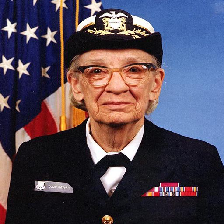

In [13]:
# Download a single image to try the model on

import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file("image.jpg",
                                       "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SIZE)

grace_hopper 

    - She is Grace Murray Hopper, and the following is her wiki.

    - https://ja.wikipedia.org/wiki/%E3%82%B0%E3%83%AC%E3%83%BC%E3%82%B9%E3%83%BB%E3%83%9B%E3%83%83%E3%83%91%E3%83%BC

In [14]:
grace_hopper = np.array(grace_hopper)/255.0

grace_hopper.shape

(224, 224, 3)

In [15]:
# Predict

result = classifier_model.predict(grace_hopper[np.newaxis, ...])

result.shape

(1, 1001)

In [16]:
# Check the code

grace_hopper[np.newaxis, ...].shape

(1, 224, 224, 3)

In [17]:
grace_hopper[np.newaxis, :,:,:].shape

(1, 224, 224, 3)

In [18]:
# Argmax

predicted_class = np.argmax(result[0], axis=-1)

predicted_class

653

In [19]:
# Check the code

result

array([[ 0.17920238,  1.2696201 , -0.31498277, ...,  0.6060549 ,
        -0.42997688,  0.11200248]], dtype=float32)

In [20]:
result[0]

array([ 0.17920238,  1.2696201 , -0.31498277, ...,  0.6060549 ,
       -0.42997688,  0.11200248], dtype=float32)

### Decode the Predictions

In [21]:
# Fetch the ImageNet labels

labels_path = tf.keras.utils.get_file("ImageNetLabels.txt",
                                      "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt")
imagenet_labels = np.array(open(labels_path).read().splitlines())

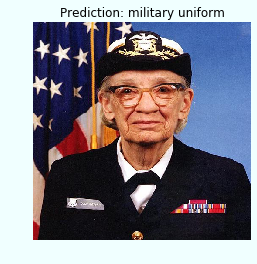

In [22]:
# Decode the predictions

plt.figure(facecolor="azure", edgecolor="coral")
plt.imshow(grace_hopper)
plt.axis("off")
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name)

### Run It on a Batch of Images

In [23]:
# Run the classifier on the image batch

# Predict
result_batch = classifier_model.predict(image_batch)

In [24]:
labels_batch = imagenet_labels[np.argmax(result_batch, axis=-1)]

labels_batch

array(['bee', 'artichoke', 'dining table', 'daisy', 'daisy', 'daisy',
       'tarantula', 'tray', 'daisy', 'mushroom', 'vase', 'mailbox',
       'daisy', 'daisy', 'pot', 'greenhouse', 'spider web', 'daisy',
       'hay', 'barber chair', 'daisy', 'red wine', 'teddy', 'honeycomb',
       'daisy', 'hip', 'picket fence', 'pot', 'daisy',
       'red-backed sandpiper', 'daisy', 'daisy'], dtype='<U30')

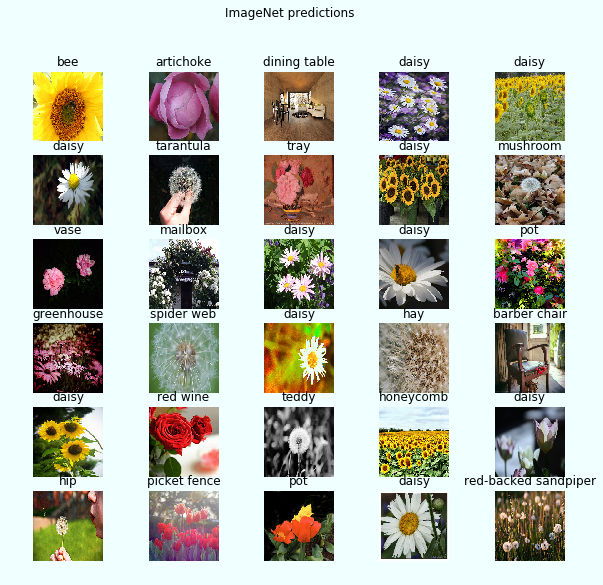

In [25]:
# Check how these predictions line up with the images

plt.figure(figsize=(10,9), facecolor="azure", edgecolor="coral")

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(labels_batch[n])
    plt.axis('off')

_ = plt.suptitle("ImageNet predictions")

    - See the LICENSE.txt file for image attributions.

    - The results are far from perfect, but reasonable considering that these are not the classes the model was trained for (except "daisy").

### Download the Headless Model

In [26]:
# URL

feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2"   #@param {type:"string"}

In [27]:
# Create the module, and check the expected image size

def feature_extractor(x):
    feature_extractor_module = hub.Module(feature_extractor_url)
    return feature_extractor_module(x)

IMAGE_SIZE = hub.get_expected_image_size(hub.Module(feature_extractor_url))

In [28]:
# Ensure the data generator is generating images of the expected size

image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)

for image_batch,label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Labe batch shape: ", label_batch.shape)
    break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 5)


In [29]:
# Wrap the module in a keras layer

features_extractor_layer = layers.Lambda(feature_extractor, input_shape=IMAGE_SIZE+[3])

In [30]:
# Freeze the variables in the feature extractor layer, so that the training only modifies the new classifier layer

features_extractor_layer.trainable = False

### Attach a Classification Head

In [31]:
# Wrap the hub layer in a "tf.keras.Sequential" model, and add a new classification layer

model = tf.keras.Sequential([
    features_extractor_layer,
    layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0308 14:56:37.768403 4493510080 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 6,405
Trainable params: 6,405
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Initialize the TFHub module

init = tf.global_variables_initializer()
sess.run(init)

In [33]:
# Test run a single batch, to see that the result comes back with the expected shape

result = model.predict(image_batch)

result.shape

(32, 5)

### Train the Model

In [34]:
# Use compile to configure the training process

model.compile(
    optimizer=tf.train.AdamOptimizer(), 
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [35]:
# Create a class to collect batch stats
# To visualize the training progress during that epoch, use a custom "callback" to log the loss and accuract of each batch

class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []

    def on_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])

In [36]:
steps_per_epoch = image_data.samples // image_data.batch_size

# Initialize
batch_stats = CollectBatchStats()

# Fit
model.fit((item for item in image_data), epochs=1, steps_per_epoch=steps_per_epoch, callbacks=[batch_stats])

Instructions for updating:
Use tf.cast instead.


W0308 14:56:44.263942 4493510080 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


114/114 [==============================] - 135s 1s/step - loss: 0.6700 - acc: 0.7515


<Figure size 432x288 with 0 Axes>

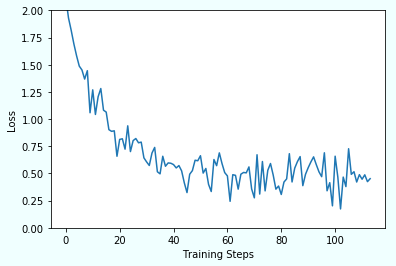

<Figure size 432x288 with 0 Axes>

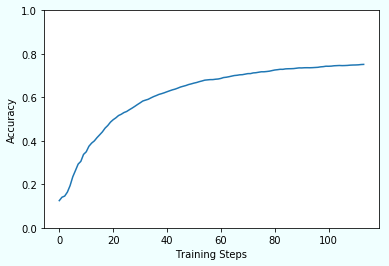

In [37]:
# Plot

plt.figure()
plt.figure(facecolor="azure", edgecolor="coral")
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.figure(facecolor="azure", edgecolor="coral")
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

### Check the Predictions

In [38]:
# Get the ordered list of class names

label_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])

label_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [39]:
# Run the image batch through the model and comvert the indices to class names

result_batch = model.predict(image_batch)

labels_batch = label_names[np.argmax(result_batch, axis=-1)]

labels_batch

array(['Daisy', 'Tulips', 'Sunflowers', 'Roses', 'Dandelion', 'Dandelion',
       'Daisy', 'Dandelion', 'Dandelion', 'Sunflowers', 'Dandelion',
       'Sunflowers', 'Dandelion', 'Sunflowers', 'Dandelion', 'Dandelion',
       'Sunflowers', 'Daisy', 'Sunflowers', 'Dandelion', 'Sunflowers',
       'Dandelion', 'Dandelion', 'Tulips', 'Tulips', 'Tulips', 'Daisy',
       'Roses', 'Daisy', 'Daisy', 'Roses', 'Tulips'], dtype='<U10')

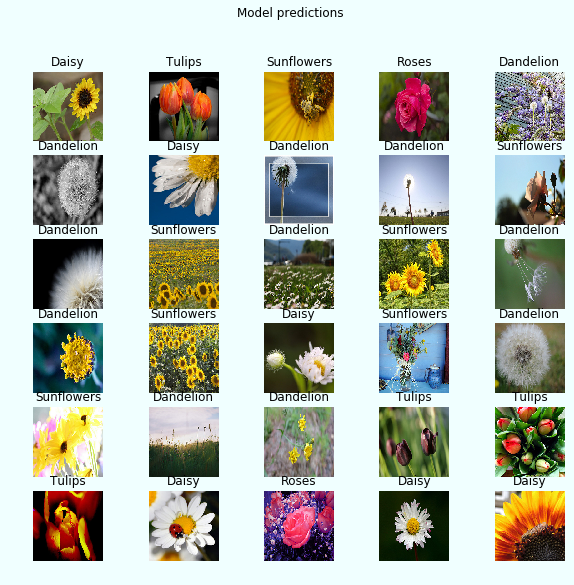

In [40]:
# Plot

plt.figure(figsize=(10,9), facecolor="azure", edgecolor="coral")

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(labels_batch[n])
    plt.axis('off')

_ = plt.suptitle("Model predictions")

In [41]:
# Export the model as a saved model

export_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")

export_path


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


W0308 14:59:10.675099 4493510080 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:1436: update_checkpoint_state (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0308 14:59:13.930290 4493510080 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


W0308 14:59:15.436456 4493510080 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:257: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0308 14:59:15.438369 4493510080 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0308 14:59:15.440367 4493510080 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0308 14:59:15.442340 4493510080 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


I0308 14:59:15.444411 4493510080 export.py:587] Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0308 14:59:15.445926 4493510080 export.py:587] Signatures INCLUDED in export for Eval: None


W0308 14:59:15.447514 4493510080 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0308 14:59:16.529072 4493510080 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0308 14:59:16.530771 4493510080 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0308 14:59:19.507400 4493510080 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0308 14:59:20.500890 4493510080 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0308 14:59:20.502325 4493510080 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0308 14:59:20.503831 4493510080 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0308 14:59:20.505527 4493510080 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


I0308 14:59:20.507070 4493510080 export.py:587] Signatures INCLUDED in export for Eval: ['eval']


W0308 14:59:20.509005 4493510080 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0308 14:59:21.093805 4493510080 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0308 14:59:21.095838 4493510080 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0308 14:59:24.603998 4493510080 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0308 14:59:25.471333 4493510080 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0308 14:59:25.472681 4493510080 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0308 14:59:25.473761 4493510080 export.py:587] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0308 14:59:25.475223 4493510080 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0308 14:59:25.476646 4493510080 export.py:587] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


I0308 14:59:26.049946 4493510080 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0308 14:59:26.051364 4493510080 builder_impl.py:124] No assets to write.


INFO:tensorflow:SavedModel written to: ./saved_models/1552024749/saved_model.pb


I0308 14:59:26.534820 4493510080 builder_impl.py:414] SavedModel written to: ./saved_models/1552024749/saved_model.pb


b'./saved_models/1552024749'

# Rewrite to Other Kinds of Frameworks

<br />

I will rewrite codes of TensorFlow that I created on the sprint 14 that handle 4 kinds of datasets to the other kind of frameworks, Keras.

## [Task 2] Fit Iris Dataset by Keras (Binary Classification)

In [42]:
# Read dataset

dataset_path = "Iris.csv"
df = pd.read_csv(dataset_path)

In [43]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
# Extract conditions

df = df[(df["Species"]=="Iris-versicolor") | (df["Species"]=="Iris-virginica")]

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

y = np.array(y)
X = np.array(X)

In [45]:
# Change labels to values

y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1

y = y.astype(np.int)[:, np.newaxis]

In [46]:
# Split the dataframe into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
# Split the train dataset into train and validation datasets again

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [48]:
# Set hyperparameters

LEARNING_RATE = 0.01
BATCH_SIZE = 10
NUM_EPOCHS = 10

In [49]:
N_HIDDEN1 = 50
N_HIDDEN2 = 100
N_CLASSES = 1

In [50]:
# Initialize
model = tf.keras.Sequential()

# 1st layer
model.add(tf.keras.layers.Dense(N_HIDDEN1, activation=tf.nn.relu, input_shape=(4,)))

# 2nd layer
model.add(tf.keras.layers.Dense(N_HIDDEN2, activation=tf.nn.relu))

# 3rd layer
model.add(tf.keras.layers.Dense(N_CLASSES, activation=tf.nn.sigmoid))

In [51]:
# Check

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile

model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])

In [53]:
# Fit

history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 1s 16ms/sample - loss: 0.9306 - acc: 0.6250 - val_loss: 1.1736 - val_acc: 0.3750
Epoch 2/10
64/64 [==============================] - 0s 275us/sample - loss: 0.8191 - acc: 0.4062 - val_loss: 0.6266 - val_acc: 0.6250
Epoch 3/10
64/64 [==============================] - 0s 311us/sample - loss: 0.6435 - acc: 0.5781 - val_loss: 0.6868 - val_acc: 0.3750
Epoch 4/10
64/64 [==============================] - 0s 277us/sample - loss: 0.5996 - acc: 0.5312 - val_loss: 0.5797 - val_acc: 0.8750
Epoch 5/10
64/64 [==============================] - 0s 278us/sample - loss: 0.5625 - acc: 0.9062 - val_loss: 0.5269 - val_acc: 0.9375
Epoch 6/10
64/64 [==============================] - 0s 282us/sample - loss: 0.4797 - acc: 0.9062 - val_loss: 0.5065 - val_acc: 0.8125
Epoch 7/10
64/64 [==============================] - 0s 287us/sample - loss: 0.3977 - acc: 0.8906 - val_loss: 0.3411 - val_acc: 0.8750
Epoch 8/10
64/64 [=

In [54]:
# Predict

y_pred_proba = model.predict(X_test)[:,0]

# Change probabilities to 0/1
y_pred = np.where(y_pred_proba>0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0.33300477 0.98655796 0.27791595 0.99516517 0.93913674 0.9902762
 0.5676969  0.8769428  0.9929088  0.9545278  0.9766804  0.9776076
 0.9908496  0.4928306  0.08918384 0.16773272 0.8206212  0.10476751
 0.92548275 0.17782708]
y_pred [0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0]


In [55]:
# Evaluate

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3738973140716553
Test accuracy: 0.85


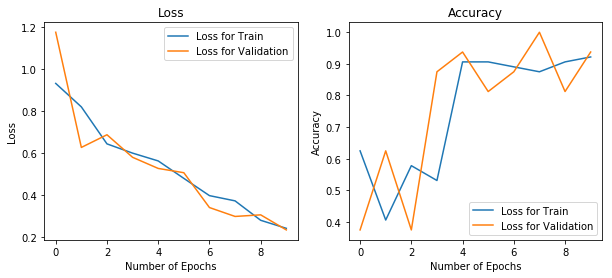

In [57]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="Loss for Train")
    axL.plot(fit.history['val_loss'],label="Loss for Validation")
    axL.set_title('Loss')
    axL.set_xlabel('Number of Epochs')
    axL.set_ylabel('Loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="Loss for Train")
    axR.plot(fit.history['val_acc'],label="Loss for Validation")
    axR.set_title('Accuracy')
    axR.set_xlabel('Number of Epochs')
    axR.set_ylabel('Accuracy')
    axR.legend(loc='lower right')

plot_history_loss(history)
plot_history_acc(history)

## [Task 7] Comparison among Frameworks